# Data Cleaning

Andres Oats Garcia


In [228]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from plotnine import *
import plotnine

In [229]:
#importing the data from the excel files
spain_data = pd.read_excel("Spain_Data.xlsx")
us_data = pd.read_excel("US_data.xlsx")

In [230]:
#converting the Spain data to have columns as variables
spain_data = spain_data.transpose()

#cleaning the column names
spain_data = spain_data.rename(columns={0:"Spain Economic Activity, Industrial production (Index)", 1: "Spain, Exchange rates relative to the US dollar", 2:"Spain, International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)", 3:"Spain, Consumer prices (All items)"})
spain_data = spain_data.reset_index()
spain_data = spain_data.drop(0)

spain_data.head(10)

,index,"Spain Economic Activity, Industrial production (Index)","Spain, Exchange rates relative to the US dollar","Spain, International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)","Spain, Consumer prices (All items)"
1,Jan 1960,NaN,0.016667,233.0,2.857368
2,Feb 1960,NaN,0.016667,253.0,2.855049
3,Mar 1960,NaN,0.016667,299.0,2.851573
4,Apr 1960,NaN,0.016667,326.0,2.853891
5,May 1960,NaN,0.016667,360.0,2.845198
6,Jun 1960,NaN,0.016667,406.0,2.842878
7,Jul 1960,NaN,0.016667,427.0,2.841719
8,Aug 1960,NaN,0.016667,455.0,2.847516
9,Sep 1960,NaN,0.016667,479.0,2.864902
10,Oct 1960,NaN,0.016667,527.0,2.872438


In [231]:
#similarly for US data, so that columns are variables
us_data = us_data.transpose()

#cleaning the column names
us_data = us_data.rename(columns={0:"US, International Reserves", 1:"US, Consumer Prices, All Items"})
us_data = us_data.reset_index()
us_data = us_data.drop(0)

us_data.head(10)

,index,"US, International Reserves","US, Consumer Prices, All Items"
1,Jan 1960,21478.1,13.436946
2,Feb 1960,21395.7,13.482806
3,Mar 1960,21344.7,13.482806
4,Apr 1960,21278.0,13.528666
5,May 1960,21234.3,13.528666
6,Jun 1960,21169.8,13.574526
7,Jul 1960,20999.4,13.574526
8,Aug 1960,20803.4,13.574526
9,Sep 1960,20430.0,13.574526
10,Oct 1960,20068.2,13.666246


In [232]:
#merging the two data sets
combined_df = spain_data.merge(us_data, on="index")
combined_df.head(10)

,index,"Spain Economic Activity, Industrial production (Index)","Spain, Exchange rates relative to the US dollar","Spain, International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)","Spain, Consumer prices (All items)","US, International Reserves","US, Consumer Prices, All Items"
0,Jan 1960,NaN,0.016667,233.0,2.857368,21478.1,13.436946
1,Feb 1960,NaN,0.016667,253.0,2.855049,21395.7,13.482806
2,Mar 1960,NaN,0.016667,299.0,2.851573,21344.7,13.482806
3,Apr 1960,NaN,0.016667,326.0,2.853891,21278.0,13.528666
4,May 1960,NaN,0.016667,360.0,2.845198,21234.3,13.528666
5,Jun 1960,NaN,0.016667,406.0,2.842878,21169.8,13.574526
6,Jul 1960,NaN,0.016667,427.0,2.841719,20999.4,13.574526
7,Aug 1960,NaN,0.016667,455.0,2.847516,20803.4,13.574526
8,Sep 1960,NaN,0.016667,479.0,2.864902,20430.0,13.574526
9,Oct 1960,NaN,0.016667,527.0,2.872438,20068.2,13.666246


## Defining variables

I now construct the following variables for Spain: \
(i) The log exchange rate \
(ii) The difference in the log exchange rate versus the previous month \
(iii) The monthly inflation rate \
(iv) Log industrial production -- Note that since the industrial production is an index, the log industrial production is in fact a log of the index number\
(v) Monthly growth in industrial production -- for this variable, I have calculated the difference in log values, which is approximately equal to the percentage change\
(vi) Growth in industrial production versus 12 months ago (i.e. January 1971 versus January 1970 etc.) -- I have calculated percentage change \
(vii) An index of the value of international reserves (value of reserves at January 1960 = 100) \
\
and for the US \
(i) The monthly inflation rate \
(ii) An index of the value of international reserves (value of reserves at January 1960 = 100) \

We can use some built in pandas functions and use lambda mappings to create these new variables. I create a new dataframe for these variables called analysis_df


In [233]:
#new dataframe for the new variables
analysis_df = pd.DataFrame()

#adding the years to the new data frame
analysis_df['Date'] = combined_df['index']

#calculating the log exchange rate  using the map function and a lambda function that applies the numpy log function
analysis_df['Spain Log Exchange Rate'] = combined_df["Spain, Exchange rates relative to the US dollar"].map(lambda x: np.log(x))

#calculating the monthly difference in log exchange rate which is approx. equal to the percentage change
analysis_df['Spain Monthly Difference in Log Exchange Rate'] = analysis_df['Spain Log Exchange Rate'].diff(periods=1)

#calculating the monthly inflation rate using the built in function pct_change and the Consumer Price Index column
analysis_df['Spain Monthly Inflation Rate %'] = combined_df['Spain, Consumer prices (All items)'].pct_change() * 100

#calculating the log industrial production rate using the map function and a lambda function that applies the numpy log function
analysis_df['Spain Log Industrial Production'] = combined_df['Spain Economic Activity, Industrial production (Index)'].map(lambda x: np.log(x))

#calculating the monthly growth by using difference in log industrial production which is approx the percentage change
analysis_df['Spain Monthly Difference in Log Industrial Production'] = analysis_df['Spain Log Industrial Production'].diff(periods=1)

#calculating the 12 month percentrage change in industrial production: 
#find the difference in log values over the 12 month period and multiply by 100 to get the aprox percentage change
analysis_df['Spain Growth in industrial production versus 12 months ago % change'] = analysis_df['Spain Log Industrial Production'].diff(periods=12) * 100

#creating an index of international reserves, Jan 1960 = 100)
#the Jan 1960 value is: 233.0:
base_year_value = combined_df['Spain, International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)'][0]

#calculating the index by dividing each months value by the base value and multiplying by 100
analysis_df['Spain Index of International Reserves']  = combined_df['Spain, International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)'].map(lambda x: x/ base_year_value * 100)

#similarly for the United States:
#the monthly inflation rate is: 
analysis_df['US Monthly Inflation Rate %'] = combined_df['US, Consumer Prices, All Items'].pct_change() * 100

#an index for international reserves in the US (Jan 1960 = 100): 
#the Jan 1960 value is: 233.0:
base_year_value = combined_df['US, International Reserves'][0]

#calculating the index by dividing each months value by the base value and multiplying by 100
analysis_df['US Index of International Reserves']  = combined_df['US, International Reserves'].map(lambda x: x/ base_year_value * 100)

#converting date to datetime value for easier plotting
analysis_df['Date'] = pd.to_datetime(analysis_df['Date'])

analysis_df.head(10) 



,Date,Spain Log Exchange Rate,Spain Monthly Difference in Log Exchange Rate,Spain Monthly Inflation Rate %,Spain Log Industrial Production,Spain Monthly Difference in Log Industrial Production,Spain Growth in industrial production versus 12 months ago % change,Spain Index of International Reserves,US Monthly Inflation Rate %,US Index of International Reserves
0,1960-01-01,-4.094345,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,100.000000
1,1960-02-01,-4.094345,0.0,-0.081128,NaN,NaN,NaN,108.583691,0.341297,99.616353
2,1960-03-01,-4.094345,0.0,-0.121770,NaN,NaN,NaN,128.326180,0.000000,99.378902
3,1960-04-01,-4.094345,0.0,0.081292,NaN,NaN,NaN,139.914163,0.340136,99.068353
4,1960-05-01,-4.094345,0.0,-0.304609,NaN,NaN,NaN,154.506438,0.000000,98.864890
5,1960-06-01,-4.094345,0.0,-0.081515,NaN,NaN,NaN,174.248927,0.338983,98.564584
6,1960-07-01,-4.094345,0.0,-0.040791,NaN,NaN,NaN,183.261803,0.000000,97.771218
7,1960-08-01,-4.094345,0.0,0.203996,NaN,NaN,NaN,195.278970,0.000000,96.858661
8,1960-09-01,-4.094345,0.0,0.610582,NaN,NaN,NaN,205.579399,0.000000,95.120146
9,1960-10-01,-4.094345,0.0,0.263041,NaN,NaN,NaN,226.180258,0.675676,93.435639


## Identifying Outliers

I use plotnine to plot boxplots and histograms to determine if there are any outliers


### Spain Log Exchange Rate

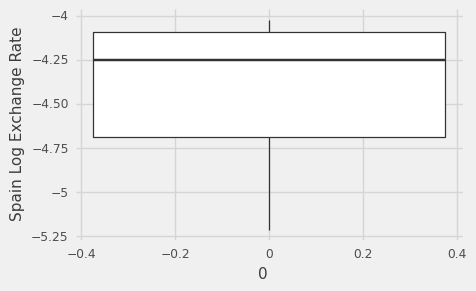

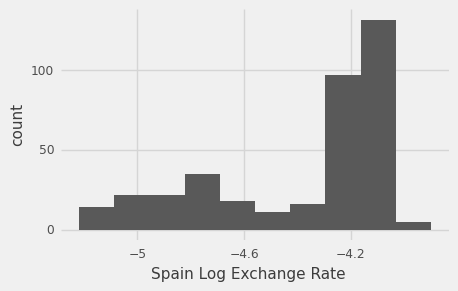

(<ggplot: (336738091)>, <ggplot: (336741650)>)

In [234]:
plotnine.options.figure_size = (5,3)
g1_1 = ggplot(analysis_df, aes(x=0,y="Spain Log Exchange Rate")) + geom_boxplot() + theme_538()
g1_2 = ggplot(analysis_df, aes(x="Spain Log Exchange Rate")) + geom_histogram(bins= 10) + theme_538()

g1_1, g1_2

From these plots, it seems that the Spanish Log Exchange Rate does not have any outliers in this period.

### Spain Monthly Difference in Log Exchange Rates

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.


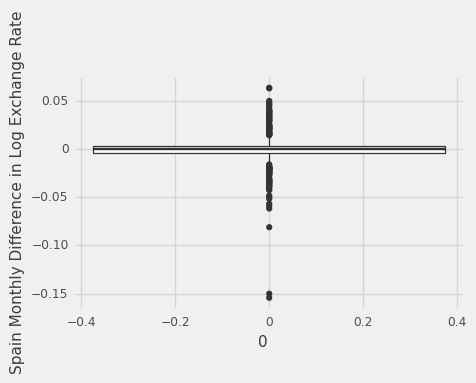

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.


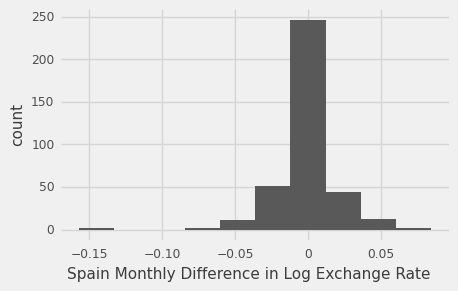

(<ggplot: (336447134)>, <ggplot: (336282898)>)

In [235]:
plotnine.options.figure_size = (5,3)
g1_1 = ggplot(analysis_df, aes(x=0,y="Spain Monthly Difference in Log Exchange Rate")) + geom_boxplot() + theme_538()
g1_2 = ggplot(analysis_df, aes(x="Spain Monthly Difference in Log Exchange Rate")) + geom_histogram(bins= 10) + theme_538()

g1_1, g1_2,

These plots make it clear that there are clearly some large outliers in the log exchange rate monthly difference for Spain. I am, however, reluctant to remove such outliers since we are aiming to examine the impact of changes in exchange rate discipline. Furthermore, these outliers may simply be due to sudden changes in exchange rate caused by volatile periods and hence removing such outliers may remove such trends. 

### Spain Monthly Inflation 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.


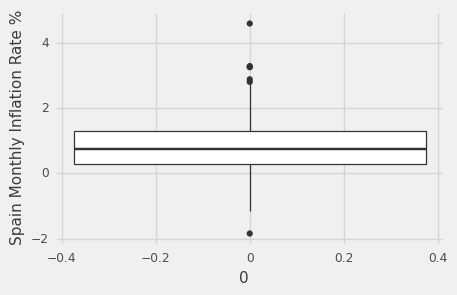

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.


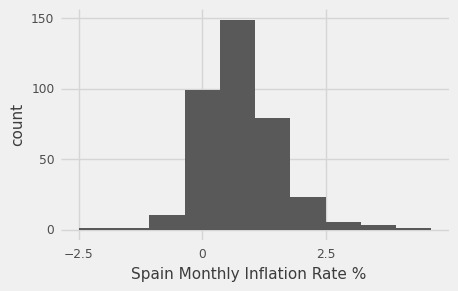

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


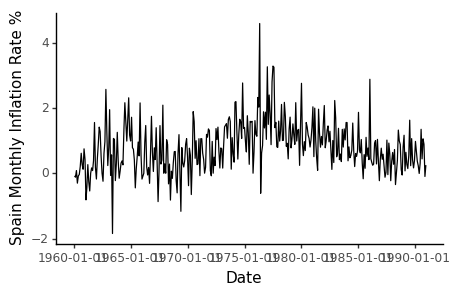

(<ggplot: (332736933)>, <ggplot: (331207960)>, <ggplot: (335814467)>)

In [236]:
plotnine.options.figure_size = (5,3)
g1_1 = ggplot(analysis_df, aes(x=0,y="Spain Monthly Inflation Rate %")) + geom_boxplot() + theme_538()
g1_2 = ggplot(analysis_df, aes(x="Spain Monthly Inflation Rate %")) + geom_histogram(bins= 10) + theme_538()
g1_3 = ggplot(analysis_df, aes(x="Date", y="Spain Monthly Inflation Rate %",group = 1)) + geom_line() + theme_classic()

g1_1, g1_2, g1_3

There are few outliers here, and those outliers that do occur seem to be in a feasible region (between -2% and 4%) for periods of particularly high inflation. Looking at these inflation rates over time, the outliers may simply be natural periods of very high or low inflation. 

### Spain Log Industrial Production

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 12 rows containing non-finite values.


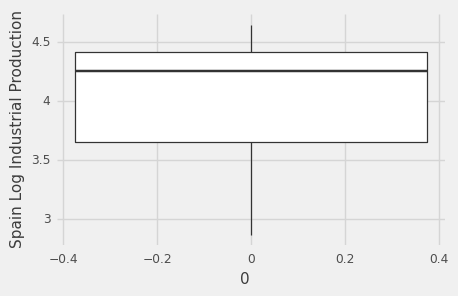

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin : Removed 12 rows containing non-finite values.


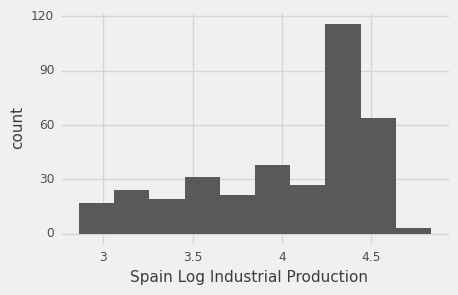

(<ggplot: (335684206)>, <ggplot: (335693788)>)

In [237]:
plotnine.options.figure_size = (5,3)
g1_1 = ggplot(analysis_df, aes(x=0,y="Spain Log Industrial Production")) + geom_boxplot() + theme_538()
g1_2 = ggplot(analysis_df, aes(x="Spain Log Industrial Production")) + geom_histogram(bins= 10) + theme_538()

g1_1, g1_2

There do not seem to be any outliers in this variable

### Spain Monthly Difference In Log Industrial Production

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 13 rows containing non-finite values.


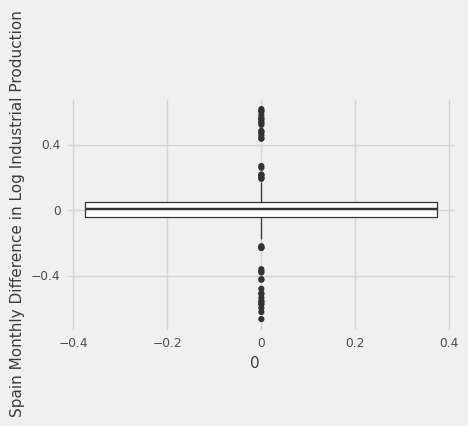

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin : Removed 13 rows containing non-finite values.


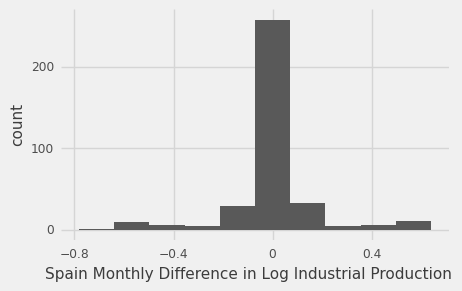

(<ggplot: (335642850)>, <ggplot: (335934200)>)

In [238]:
plotnine.options.figure_size = (5,3)
g1_1 = ggplot(analysis_df, aes(x=0,y="Spain Monthly Difference in Log Industrial Production")) + geom_boxplot() + theme_538()
g1_2 = ggplot(analysis_df, aes(x="Spain Monthly Difference in Log Industrial Production")) + geom_histogram(bins= 10) + theme_538()

g1_1, g1_2

From the above box plot, we can see there are a number of outliers in the Monthly Difference in Log Industrial Production in Spain, however, i do not think we should remove these values since these may represent some underlying trend -- the histogram demonstrates this as there seems to be a roughly equal number of very high and low differences

### Spain Growth in industrial production versus 12 months ago % change *

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 24 rows containing non-finite values.


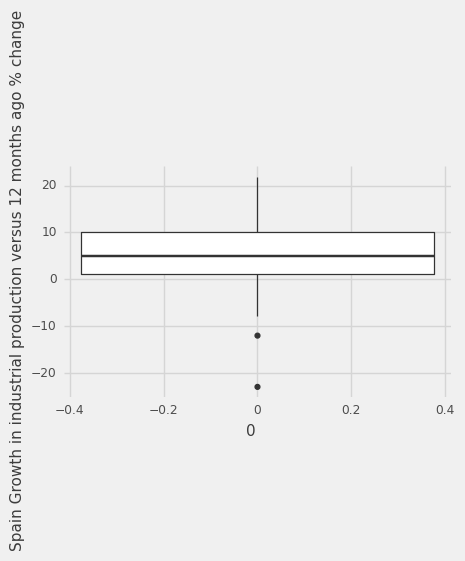

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin : Removed 24 rows containing non-finite values.


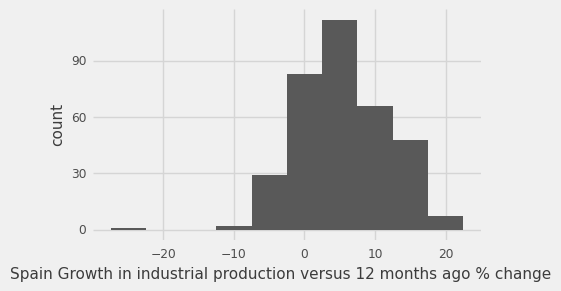

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 24 rows containing missing values.


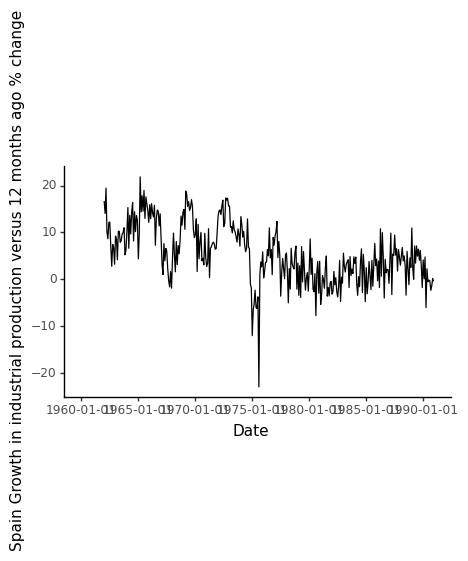

(<ggplot: (335516865)>, <ggplot: (335498832)>, <ggplot: (335508099)>)

In [239]:
plotnine.options.figure_size = (5,3)

g1_1 = ggplot(analysis_df, aes(x=0,y="Spain Growth in industrial production versus 12 months ago % change")) + geom_boxplot() + theme_538()
g1_2 = ggplot(analysis_df, aes(x="Spain Growth in industrial production versus 12 months ago % change")) + geom_histogram(bins= 10) + theme_538()
g1_3 = ggplot(analysis_df, aes(x="Date")) + geom_line(aes(y="Spain Growth in industrial production versus 12 months ago % change")) + theme_classic()

g1_1, g1_2, g1_3

Whilst the box plot shows that there are many outliers, this is to be expected since there will be periods of substantially high growth over the course of a particular year. Furthermore, in a recessionary period, the 12 month growth may represent the change from trough to peak or vice versa and hence this may also be a reason for the large percentage changes considered outliers.

### Spain Index of International Reserves

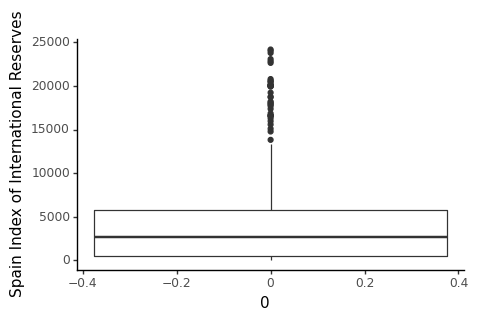

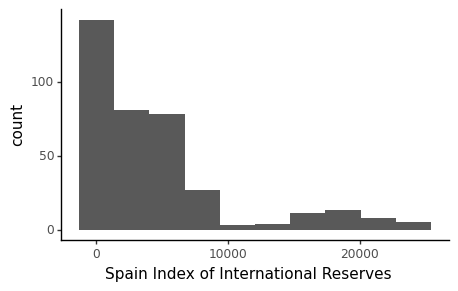

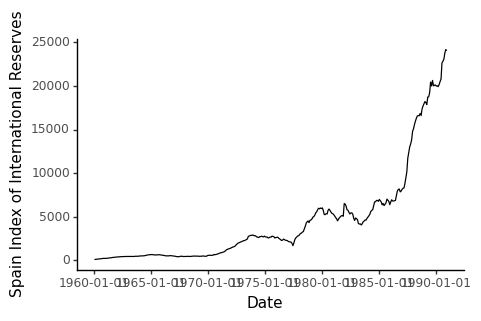

(<ggplot: (335379144)>, <ggplot: (335371361)>, <ggplot: (335361634)>)

In [240]:
plotnine.options.figure_size = (5,3)
g1_1 = ggplot(analysis_df, aes(x=0,y="Spain Index of International Reserves")) + geom_boxplot() + theme_classic()
g1_2 = ggplot(analysis_df, aes(x="Spain Index of International Reserves")) + geom_histogram(bins= 10) + theme_classic()
g1_3 = ggplot(analysis_df, aes(x="Date", y="Spain Index of International Reserves",group = 1)) + geom_line() + theme_classic()

g1_1, g1_2, g1_3

While the boxplot shows that there are outliers, we see that these are in fact not outliers and are instead part of the trend data by plotting the data over time. 

### US Monthly Inflation

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.


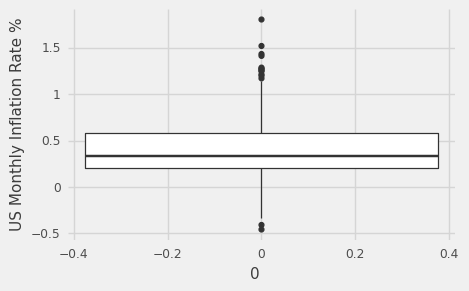

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.


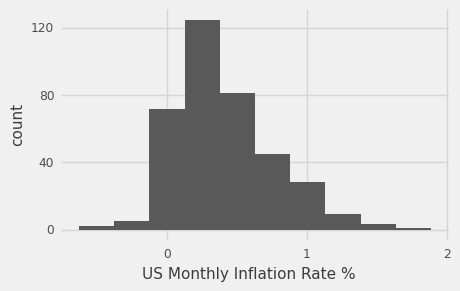

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


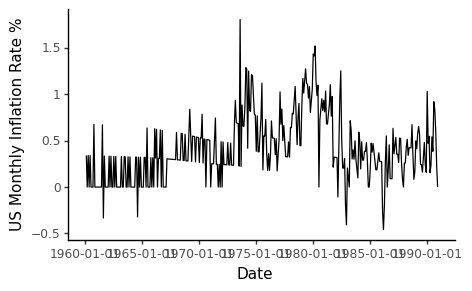

(<ggplot: (335556251)>, <ggplot: (331011733)>, <ggplot: (331011493)>)

In [241]:
plotnine.options.figure_size = (5,3)
g1_1 = ggplot(analysis_df, aes(x=0,y="US Monthly Inflation Rate %")) + geom_boxplot() + theme_538()
g1_2 = ggplot(analysis_df, aes(x="US Monthly Inflation Rate %")) + geom_histogram(bins= 10) + theme_538()
g1_3 = ggplot(analysis_df, aes(x="Date", y="US Monthly Inflation Rate %",group = 1)) + geom_line() + theme_classic()

g1_1, g1_2, g1_3

Again, there do not seem to be any obvious outliers, in particular since the outliers lie in the range between -0.5 and 1.5% which is a feasible inflation range. 

### US Index of International Reserves

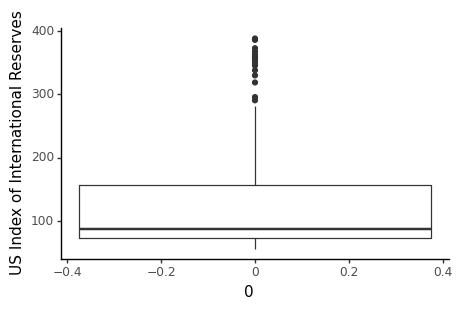

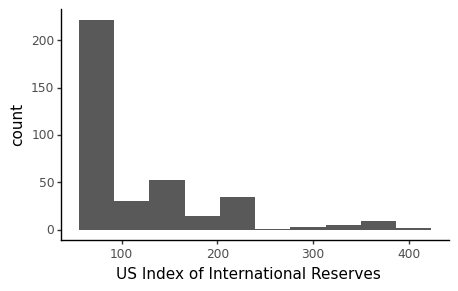

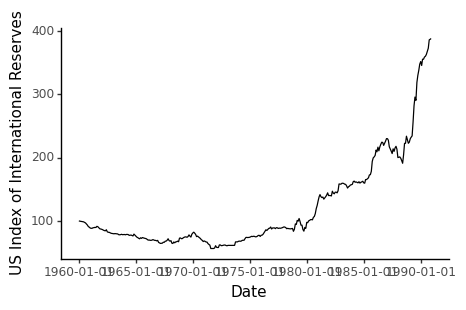

(<ggplot: (335307287)>, <ggplot: (331307726)>, <ggplot: (331297687)>)

In [242]:
plotnine.options.figure_size = (5,3)
g1_1 = ggplot(analysis_df, aes(x=0,y="US Index of International Reserves")) + geom_boxplot() + theme_classic()
g1_2 = ggplot(analysis_df, aes(x="US Index of International Reserves")) + geom_histogram(bins= 10) + theme_classic()
g1_3 = ggplot(analysis_df, aes(x="Date", y="US Index of International Reserves",group = 1)) + geom_line() + theme_classic()

g1_1, g1_2, g1_3

While the box plot shows outliers, these seem to be following the trend, as seen by plotting the index over time. 

## Dealing with outliers
From these plots above, it seems we have no obvious outliers. While some variables seem to have high variability, when plotting the variable over time these outliers seem to be part of a long term trend rather than outliers that need to be removed or dealt with. Hence, we will keep the data as imported without dealing with the outliers identified by the box plots. 

## Dealing with missing data

In [243]:
analysis_df.isna().sum()

Date                                                                    0
Spain Log Exchange Rate                                                 0
Spain Monthly Difference in Log Exchange Rate                           1
Spain Monthly Inflation Rate %                                          1
Spain Log Industrial Production                                        12
Spain Monthly Difference in Log Industrial Production                  13
Spain Growth in industrial production versus 12 months ago % change    24
Spain Index of International Reserves                                   0
US Monthly Inflation Rate %                                             1
US Index of International Reserves                                      0
dtype: int64

The data seems to have a relatively small number of missing values apart from the industrial production variable. While some variables have a missing value these tend to be in the first period due to calculating differences and thus the first month, i.e. Jan 1960, does not prior data to calculate the difference from. This explains the single na value in the following columns: Spain Monthly Difference in Log Exchange Rate, Spain Monthly Inflation Rate, US Monthly Inflation Rate.

Thus, the problematic columns are those based upon 'Spain Log Industrial Production'. This is because this variable is missing data for the first 12 observations (i.e. the entirety of 1960). Hence, the 'Spain Monthly Difference in Log Industrial Production' column has an additional missing value from the first non-na period. The 'Spain Growth in industrial production versus 12 months ago % change' has a greater number of na values since the first 25 months do not have a prior value to calculate from. (The first 12 due to there simply being no data before Jan 1960; the next 13 months due to the first 12 being na values themselves)

We cannot deal with these na values using linear interpolation since they do not have a value from the period before and after.

## Creating a series for monthly real exchange rate growth
The formula for the real exchange rate growth relative to the US dollar $x ^{\$/Pts}$, where the Spanish currency is Pesetas (denotes by Pts)  is $$x ^{\$/Pts} =  \pi^{SP} - \pi^{US} + \frac{\Delta E^{\$/Pts} }{E^{\$/Pts} }$$ where $\frac{\Delta E^{Pts/\$} }{E^{Pts/\$} }$ is the growth in the nominal exchange rate. The growth in the nominal exchange rate is approximately equal to 'Spain Monthly Difference in Log Exchange Rate" since this has been calculated as from the exchange rate relative to the US dollar. Hence we can calculate the real exchange rate growth using our variables and the above formula.

In [251]:
#calculating the real exchange rate growth using the above formula
#dividing the inflation rates by 100 since they are given as percentages rather than decimals
analysis_df['Real Exchange Rate Growth'] = -analysis_df['US Monthly Inflation Rate %']/100 + analysis_df['Spain Monthly Inflation Rate %']/100+ analysis_df['Spain Monthly Difference in Log Exchange Rate']

# Final Data


In [245]:
#exporting the data to an excel file
analysis_df.to_excel("analysis_df.xlsx")

#outputting the full dataframe
pd.options.display.max_rows = 372 

analysis_df

,Date,Spain Log Exchange Rate,Spain Monthly Difference in Log Exchange Rate,Spain Monthly Inflation Rate %,Spain Log Industrial Production,Spain Monthly Difference in Log Industrial Production,Spain Growth in industrial production versus 12 months ago % change,Spain Index of International Reserves,US Monthly Inflation Rate %,US Index of International Reserves,Real Exchange Rate Growth
0,1960-01-01,-4.094345,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,100.000000,NaN
1,1960-02-01,-4.094345,0.000000,-0.081128,NaN,NaN,NaN,108.583691,0.341297,99.616353,0.004224
2,1960-03-01,-4.094345,0.000000,-0.121770,NaN,NaN,NaN,128.326180,0.000000,99.378902,0.001218
3,1960-04-01,-4.094345,0.000000,0.081292,NaN,NaN,NaN,139.914163,0.340136,99.068353,0.002588
4,1960-05-01,-4.094345,0.000000,-0.304609,NaN,NaN,NaN,154.506438,0.000000,98.864890,0.003046
5,1960-06-01,-4.094345,0.000000,-0.081515,NaN,NaN,NaN,174.248927,0.338983,98.564584,0.004205
6,1960-07-01,-4.094345,0.000000,-0.040791,NaN,NaN,NaN,183.261803,0.000000,97.771218,0.000408
7,1960-08-01,-4.094345,0.000000,0.203996,NaN,NaN,NaN,195.278970,0.000000,96.858661,-0.002040
8,1960-09-01,-4.094345,0.000000,0.610582,NaN,NaN,NaN,205.579399,0.000000,95.120146,-0.006106
9,1960-10-01,-4.094345,0.000000,0.263041,NaN,NaN,NaN,226.180258,0.675676,93.435639,0.004126


In [247]:
(analysis_df).head(10)

,Date,Spain Log Exchange Rate,Spain Monthly Difference in Log Exchange Rate,Spain Monthly Inflation Rate %,Spain Log Industrial Production,Spain Monthly Difference in Log Industrial Production,Spain Growth in industrial production versus 12 months ago % change,Spain Index of International Reserves,US Monthly Inflation Rate %,US Index of International Reserves,Real Exchange Rate Growth
0,1960-01-01,-4.094345,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,100.000000,NaN
1,1960-02-01,-4.094345,0.0,-0.081128,NaN,NaN,NaN,108.583691,0.341297,99.616353,0.004224
2,1960-03-01,-4.094345,0.0,-0.121770,NaN,NaN,NaN,128.326180,0.000000,99.378902,0.001218
3,1960-04-01,-4.094345,0.0,0.081292,NaN,NaN,NaN,139.914163,0.340136,99.068353,0.002588
4,1960-05-01,-4.094345,0.0,-0.304609,NaN,NaN,NaN,154.506438,0.000000,98.864890,0.003046
5,1960-06-01,-4.094345,0.0,-0.081515,NaN,NaN,NaN,174.248927,0.338983,98.564584,0.004205
6,1960-07-01,-4.094345,0.0,-0.040791,NaN,NaN,NaN,183.261803,0.000000,97.771218,0.000408
7,1960-08-01,-4.094345,0.0,0.203996,NaN,NaN,NaN,195.278970,0.000000,96.858661,-0.002040
8,1960-09-01,-4.094345,0.0,0.610582,NaN,NaN,NaN,205.579399,0.000000,95.120146,-0.006106
9,1960-10-01,-4.094345,0.0,0.263041,NaN,NaN,NaN,226.180258,0.675676,93.435639,0.004126


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


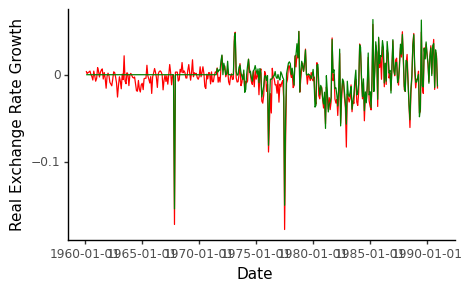

<ggplot: (331843005)>

In [252]:
ggplot(analysis_df, aes(x="Date",group = 1)) + geom_line(aes(y="Real Exchange Rate Growth"), color="red") + geom_line(aes(y="Spain Monthly Difference in Log Exchange Rate"), color="green")+ theme_classic()
